# Heart Failure Prediction

---

# i. Introduction

> This section contains the background analysis, problem statements and conceptual problems.

## Background

Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worlwide. Heart failure is a common event caused by CVDs and this dataset contains 12 features that can be used to predict mortality by heart failure.

Most cardiovascular diseases can be prevented by addressing behavioural risk factors such as tobacco use, unhealthy diet and obesity, physical inactivity and harmful use of alcohol using population-wide strategies.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.

## Problem Statements

Since there are many features that can influence the mortaility by heart failure, this analysis will __determine whether a patient will develop  a heart failure or not during their follow up period__, because of the suspected variables.

The analysis will use Ensamble Classifier: __Random Forest Classifier (RF)__ and __Adaptive Boost Classifier (AdaBoost)__. From those two algorithm, there will be an analysis for comparing the classification model and how it suggests the result of heart failure classification.

---

# ii. Query SQL
> This section contains SQL queries from Google Cloud Platform that were used in the data analysis.

```
SELECT * FROM `ftds-hacktiv8-project.phase1_ftds_018_rmt.heart-failure`
```

---

# iii. Importing Libraries
> This section contains the process of importing libraries and checking the version of the libraries that will be used in this analysis.

## Import Libraries
This section explains how to import the libraries that will be used in the analysis. The main library used for this analysis will be `scikit-learn`. In addition to scikit-learn, the libraries used in this analysis include `pandas`, `numpy`, `matplotlib`, and `seaborn`.

In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import sklearn
import imblearn

import warnings
warnings.filterwarnings('ignore')

# Data visualization libraries
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt

# handling outliers
from feature_engine.outliers import Winsorizer

# Split Dataset, Standarize, and Hyperparameter Tuning
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline
# from sklearn.pipeline import Pipeline

# import Random Forest classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

# handling imbalance
from imblearn.over_sampling import SMOTE

# Evaluate Classification Models
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score

# Save and Load Model
import pickle
import json

## Libraries Version
This section explains how to check the version of the libraries that will be used in the analysis.

In [2]:
# library version
print('pandas version :',(pd.__version__))
print('numpy version :',(np.__version__))
print('matplotlib version :',(matplotlib.__version__))
print('seaborn version :',(sns.__version__))
print('scikit-learn version :',(sklearn.__version__))
print('imbalanced-learn version :',(imblearn.__version__))

pandas version : 1.5.3
numpy version : 1.22.3
matplotlib version : 3.7.1
seaborn version : 0.12.2
scikit-learn version : 1.2.2
imbalanced-learn version : 0.11.0


---

# iv. Data Loading
> This section explains the data preparation process prior to further data exploration. The data preparation process carried out in this section includes the process of data loading, checking the size of the dataset, displaying information of the dataset, checking for missing values, checking for duplicated entries, and measuring of central tendency.

## Data Loading
This section explains the process of data loading. Dataset used in this analysis is `heart-failure` from Google Cloud Platform database.

In [3]:
# Data Loading
df= pd.read_csv('Dataset.csv')
# Displaying the top 10 rows of the dataset
df.head(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,42.0,1,250,1,15,0,213000.0,1.3,136,0,0,65,1
1,46.0,0,168,1,17,1,271000.0,2.1,124,0,0,100,1
2,65.0,1,160,1,20,0,327000.0,2.7,116,0,0,8,1
3,53.0,1,91,0,20,1,418000.0,1.4,139,0,0,43,1
4,50.0,1,582,1,20,1,279000.0,1.0,134,0,0,186,0
5,70.0,1,125,0,25,1,237000.0,1.0,140,0,0,15,1
6,65.0,1,52,0,25,1,276000.0,1.3,137,0,0,16,0
7,70.0,0,161,0,25,0,244000.0,1.2,142,0,0,66,1
8,60.0,1,76,1,25,0,196000.0,2.5,132,0,0,77,1
9,59.0,1,280,1,25,1,302000.0,1.0,141,0,0,78,1


In [4]:
# Displaying the bottom 10 rows of the dataset
df.tail(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
289,64.0,0,1610,0,60,0,242000.00,1.0,137,1,0,113,0
290,62.0,0,30,1,60,1,244000.00,0.9,139,1,0,117,0
291,53.0,0,196,0,60,0,220000.00,0.7,133,1,1,134,0
292,70.0,1,171,0,60,1,176000.00,1.1,145,1,1,146,0
293,60.0,1,95,0,60,0,337000.00,1.0,138,1,1,146,0
294,63.0,1,122,1,60,0,267000.00,1.2,145,1,0,147,0
295,45.0,0,308,1,60,1,377000.00,1.0,136,1,0,186,0
296,70.0,0,97,0,60,1,220000.00,0.9,138,1,0,186,0
297,53.0,1,446,0,60,1,263358.03,1.0,139,1,0,215,0
298,50.0,0,582,0,62,1,147000.00,0.8,140,1,1,192,0


Following are the variables and definitions of each column in the dataset.

Variable | Definition
---|---
`age` | Age in years
`anemia` | Decrease of red blood cells or hemoglobin (0 = no anaemia, 1 = has anaemia)
`creatinine_phosphokinase` | Level of the CPK enzyme in the blood (mcg/L)
`diabetes` | If the patient has diabetes (0 = no diabetes, 1 = has diabetes)
`ejection_fraction` | Percentage of blood leaving the heart at each contraction (percentage)
`high_blood_pressure` | If the patient has hypertension (0 = no, 1 = yes)
`platelets` | Platelets in the blood (kiloplatelets/mL)
`serum_creatinine` | 	Level of serum creatinine in the blood (mg/dL)
`serum_sodium` | Level of serum sodium in the blood (mEq/L)
`sex` | Woman or man (Female = 0, Male = 1)
`smoking` | If the patient smokes or not (0 = no, 1 = yes)
`time` | Follow-up period (days)
`DEATH_EVENT` | 	If the patient deceased during the follow-up period (0 = no, 1= yes)




## Size of Dataset
This section explains how to check the size of the dataset.

In [5]:
# size of dataset
df.shape

(299, 13)

## Information
This section explains the information contained in the dataset, including the index, columns, data type, non-null values, and memory usage.

In [6]:
# showing information from the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [7]:
# convert dtype
df = df.astype({'age':'float','anaemia':'float','creatinine_phosphokinase':'float','diabetes':'float','ejection_fraction':'float',
                'high_blood_pressure':'float','platelets':'float','serum_creatinine':'float','serum_sodium':'float','sex':'float',
                'smoking':'float','time':'float','DEATH_EVENT':'float'})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    float64
 2   creatinine_phosphokinase  299 non-null    float64
 3   diabetes                  299 non-null    float64
 4   ejection_fraction         299 non-null    float64
 5   high_blood_pressure       299 non-null    float64
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    float64
 9   sex                       299 non-null    float64
 10  smoking                   299 non-null    float64
 11  time                      299 non-null    float64
 12  DEATH_EVENT               299 non-null    float64
dtypes: float64(13)
memory usage: 30.5 KB


## Missing Values
This section explains the process for checking missing values.

In [8]:
# check for missing value
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

There is no missing value in this dataset.

## Checking for Duplicated Data
This section explains the process to check for duplicated data in the dataset.

In [9]:
# Check for duplicated entries
df.duplicated().value_counts()

False    299
dtype: int64

There is no duplicared data in this dataset.

## Measure of Central Tendency
The following are the measure of central tendency of the dataset used in this analysis.

In [10]:
# measure of central tendency
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


---

# v. Exploratory Data Analysis
> This section contains data exploration of the dataset used in this analysis. Two exploratory data analyses are carried out: one to find general information and another to analyze the correlation matrix.

## Numerical and Categorical Columns
This section describes the process for classifying numerical and categorical data in the dataset.

In [11]:
# Unique Value counts of all columns
df_copy =df.copy()
for i in df_copy:
    print(i,':')
    print()
    print(df_copy[i].unique())
    print('-' * 10)

age :

[42.    46.    65.    53.    50.    70.    60.    59.    72.    49.
 75.    57.    48.    62.    52.    55.    58.    86.    66.    80.
 45.    67.    90.    95.    63.    61.    60.667 40.    73.    51.
 82.    43.    85.    64.    68.    54.    69.    47.    44.    81.
 87.    94.    56.    41.    78.    77.    79.   ]
----------
anaemia :

[1. 0.]
----------
creatinine_phosphokinase :

[ 250.  168.  160.   91.  582.  125.   52.  161.   76.  280.  156. 1896.
   56.  211.   80.  128.  159.  124.  129.  328.  482.  167.  131.  166.
 2522. 1051.  249.  281.  291.  335.   58. 2334.  835.  972.   81.  572.
   88.  618.  892.  235.  260.  144.   68.   96.  776.  326.  213.   84.
  337. 1820.  112.  318.   69.   61.  400.  719.  151.  101. 2281.  720.
 1185.  207.  655.  336.  233.  244.  855.   53.  358. 1202.  615.  588.
   92.   59.  143.  102.  113.  200.   62.  675.  157. 2060. 3964.  427.
  246.  212.  146.  111.  553.  789.  364.   47.   66.  115. 1199.  231.
 1380.  577. 7702

In [12]:
# separating numerical and categorical columns
numerical = ['age','creatinine_phosphokinase','ejection_fraction','platelets','serum_creatinine','serum_sodium','time']
print('Numerical Column :',numerical)
categorical = ['anaemia','diabetes','high_blood_pressure','sex','smoking','DEATH_EVENT']
print('Categorical Column :',categorical)

Numerical Column : ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']
Categorical Column : ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking', 'DEATH_EVENT']


## Number of Death Event
This section describes data exploration to find out the number of `DEATH_EVENT`.

In [13]:
# death_event  value count
death_event = df.DEATH_EVENT.value_counts().to_frame()
death_event = death_event.reset_index()
death_event['index'] = death_event['index'].replace({0:'No',1:'Yes'})
death_event


,index,DEATH_EVENT
0,No,203
1,Yes,96


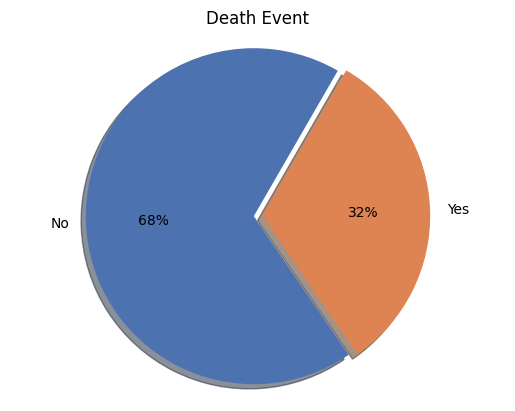

In [14]:
#create pie chart
labels = 'No', 'Yes'
colors = sns.color_palette('deep')
explode = (0.05, 0)

plt.pie(df_copy.DEATH_EVENT.value_counts(),explode=explode,labels=labels, colors = colors, autopct='%.0f%%',shadow=True,startangle=60)

plt.axis('equal')
plt.title('Death Event')
plt.show()

Number of deaths after the following days are different, where __Non-Death are 36% greater than Death__. This will be keep in mind if there is any imbalance data or not. But first, the death_event--as the target--will be compared with other variables so we can get the conclusion for the skewness and handling imbalance data.

## Gender Distribution
This section describes data exploration to find out the number of `DEATH_EVENT`.

In [15]:
# gender value count
sex = df.groupby(by=['sex','DEATH_EVENT']).aggregate(Number_of_DEATH_EVENT=('DEATH_EVENT','count'))
sex = sex.reset_index()
sex['sex'] = sex['sex'].replace({0:'Female',1:'Male'})
sex


,sex,DEATH_EVENT,Number_of_DEATH_EVENT
0,Female,0.0,71
1,Female,1.0,34
2,Male,0.0,132
3,Male,1.0,62


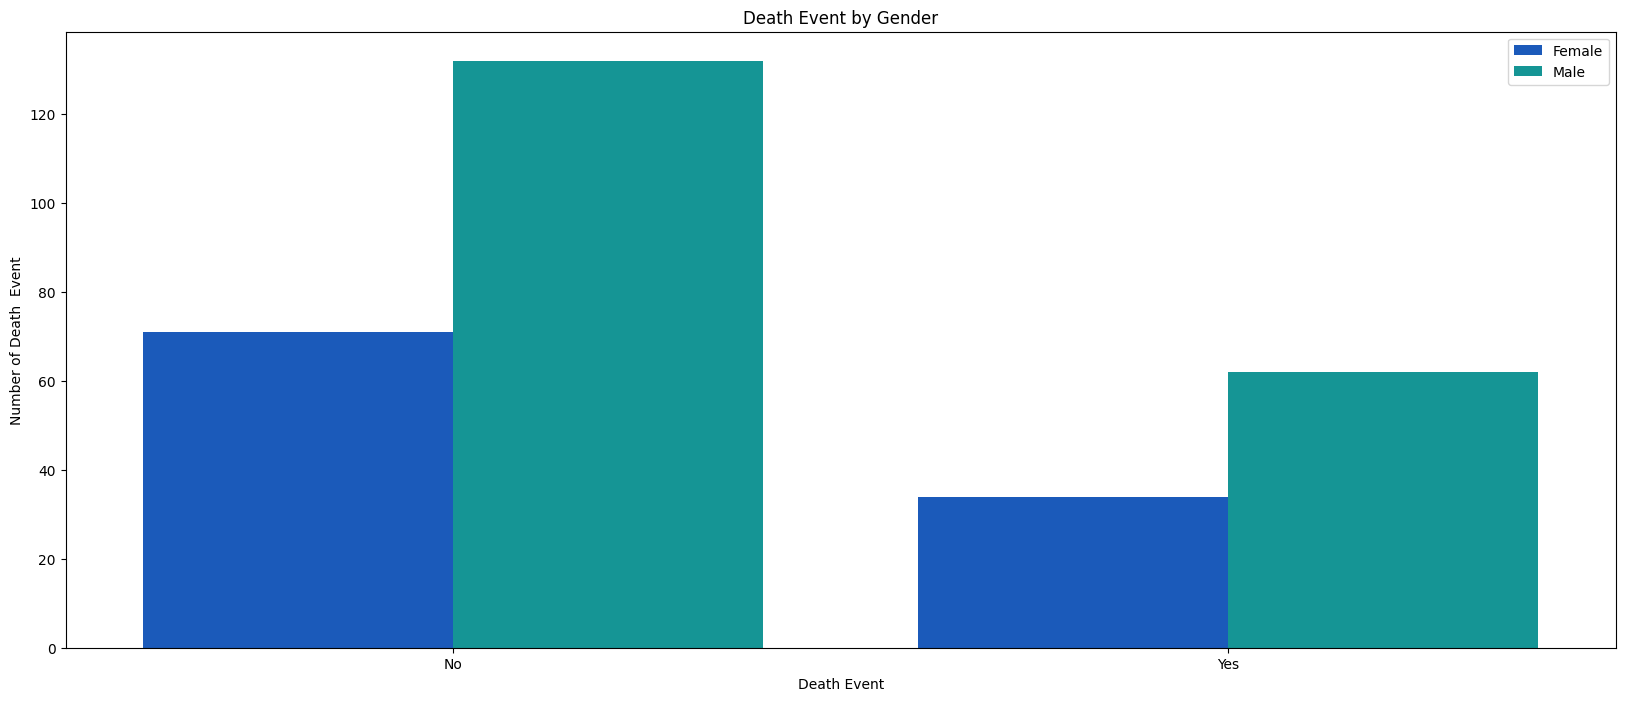

In [16]:
# Replace values in the DEATH_EVENT column
df_copy["DEATH_EVENT"] = df_copy["DEATH_EVENT"].replace({0: "No", 1: "Yes"})

# create bar chart
fig, ax = plt.subplots(figsize=(20, 8))

sns.countplot(x=df_copy.DEATH_EVENT, hue=df_copy.sex,palette='winter',order=df_copy.DEATH_EVENT.value_counts().index)

plt.title('Death Event by Gender')
plt.xlabel('Death Event')
plt.ylabel('Number of Death  Event')
plt.legend(loc='upper right',labels=['Female','Male'])
plt.show()

From the table and visualization above, it can be seen that the number of male patients with heart failure is more than female patients. Where about 32% die during the follow-up period. Further data exploration is necessary to find out the condition of male patients.

### Male Patients Condition

This section describes data exploration to find out what conditions most often cause patients to die during the follow-up period.

In [17]:
# male patients deceased during the follow up period 
df_male = df_copy.loc[(df_copy['sex']==1)&
                    (df_copy['DEATH_EVENT']=="Yes")]
df_male.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
105,45.0,0.0,582.0,0.0,14.0,0.0,166000.0,0.8,127.0,1.0,0.0,14.0,Yes
106,75.0,1.0,246.0,0.0,15.0,0.0,127000.0,1.2,137.0,1.0,0.0,10.0,Yes
108,75.0,0.0,582.0,0.0,20.0,1.0,265000.0,1.9,130.0,1.0,0.0,4.0,Yes
109,65.0,0.0,146.0,0.0,20.0,0.0,162000.0,1.3,129.0,1.0,1.0,7.0,Yes
110,50.0,1.0,111.0,0.0,20.0,0.0,210000.0,1.9,137.0,1.0,0.0,7.0,Yes


In [18]:
# Replace values in the anaemia column
df_male["anaemia"] = df_male["anaemia"].replace({0: "No", 1: "Yes"})
# anemia value counts
df_male.groupby(by=['anaemia','DEATH_EVENT']).aggregate(Number_of_DEATH_EVENT=('DEATH_EVENT','count'))


,,Number_of_DEATH_EVENT
anaemia,DEATH_EVENT,
No,Yes,36
Yes,Yes,26


In [19]:
# Replace values in the diabetes column
df_male["diabetes"] = df_male["diabetes"].replace({0: "No", 1: "Yes"})
# diabetes value counts
df_male.groupby(by=['diabetes','DEATH_EVENT']).aggregate(Number_of_DEATH_EVENT=('DEATH_EVENT','count'))


,,Number_of_DEATH_EVENT
diabetes,DEATH_EVENT,
No,Yes,42
Yes,Yes,20


In [20]:
# Replace values in the high_blood_pressure column
df_male["high_blood_pressure"] = df_male["high_blood_pressure"].replace({0: "No", 1: "Yes"})
# high_blood_pressure value counts
df_male.groupby(by=['high_blood_pressure','DEATH_EVENT']).aggregate(Number_of_DEATH_EVENT=('DEATH_EVENT','count'))

,,Number_of_DEATH_EVENT
high_blood_pressure,DEATH_EVENT,
No,Yes,40
Yes,Yes,22


In [21]:
# Replace values in the smoking column
df_male["smoking"] = df_male["smoking"].replace({0: "No", 1: "Yes"})
# smoking value counts
df_male.groupby(by=['smoking','DEATH_EVENT']).aggregate(Number_of_DEATH_EVENT=('DEATH_EVENT','count'))

,,Number_of_DEATH_EVENT
smoking,DEATH_EVENT,
No,Yes,35
Yes,Yes,27


Text(0.5, 1.0, 'Male patients with habit of smoking')

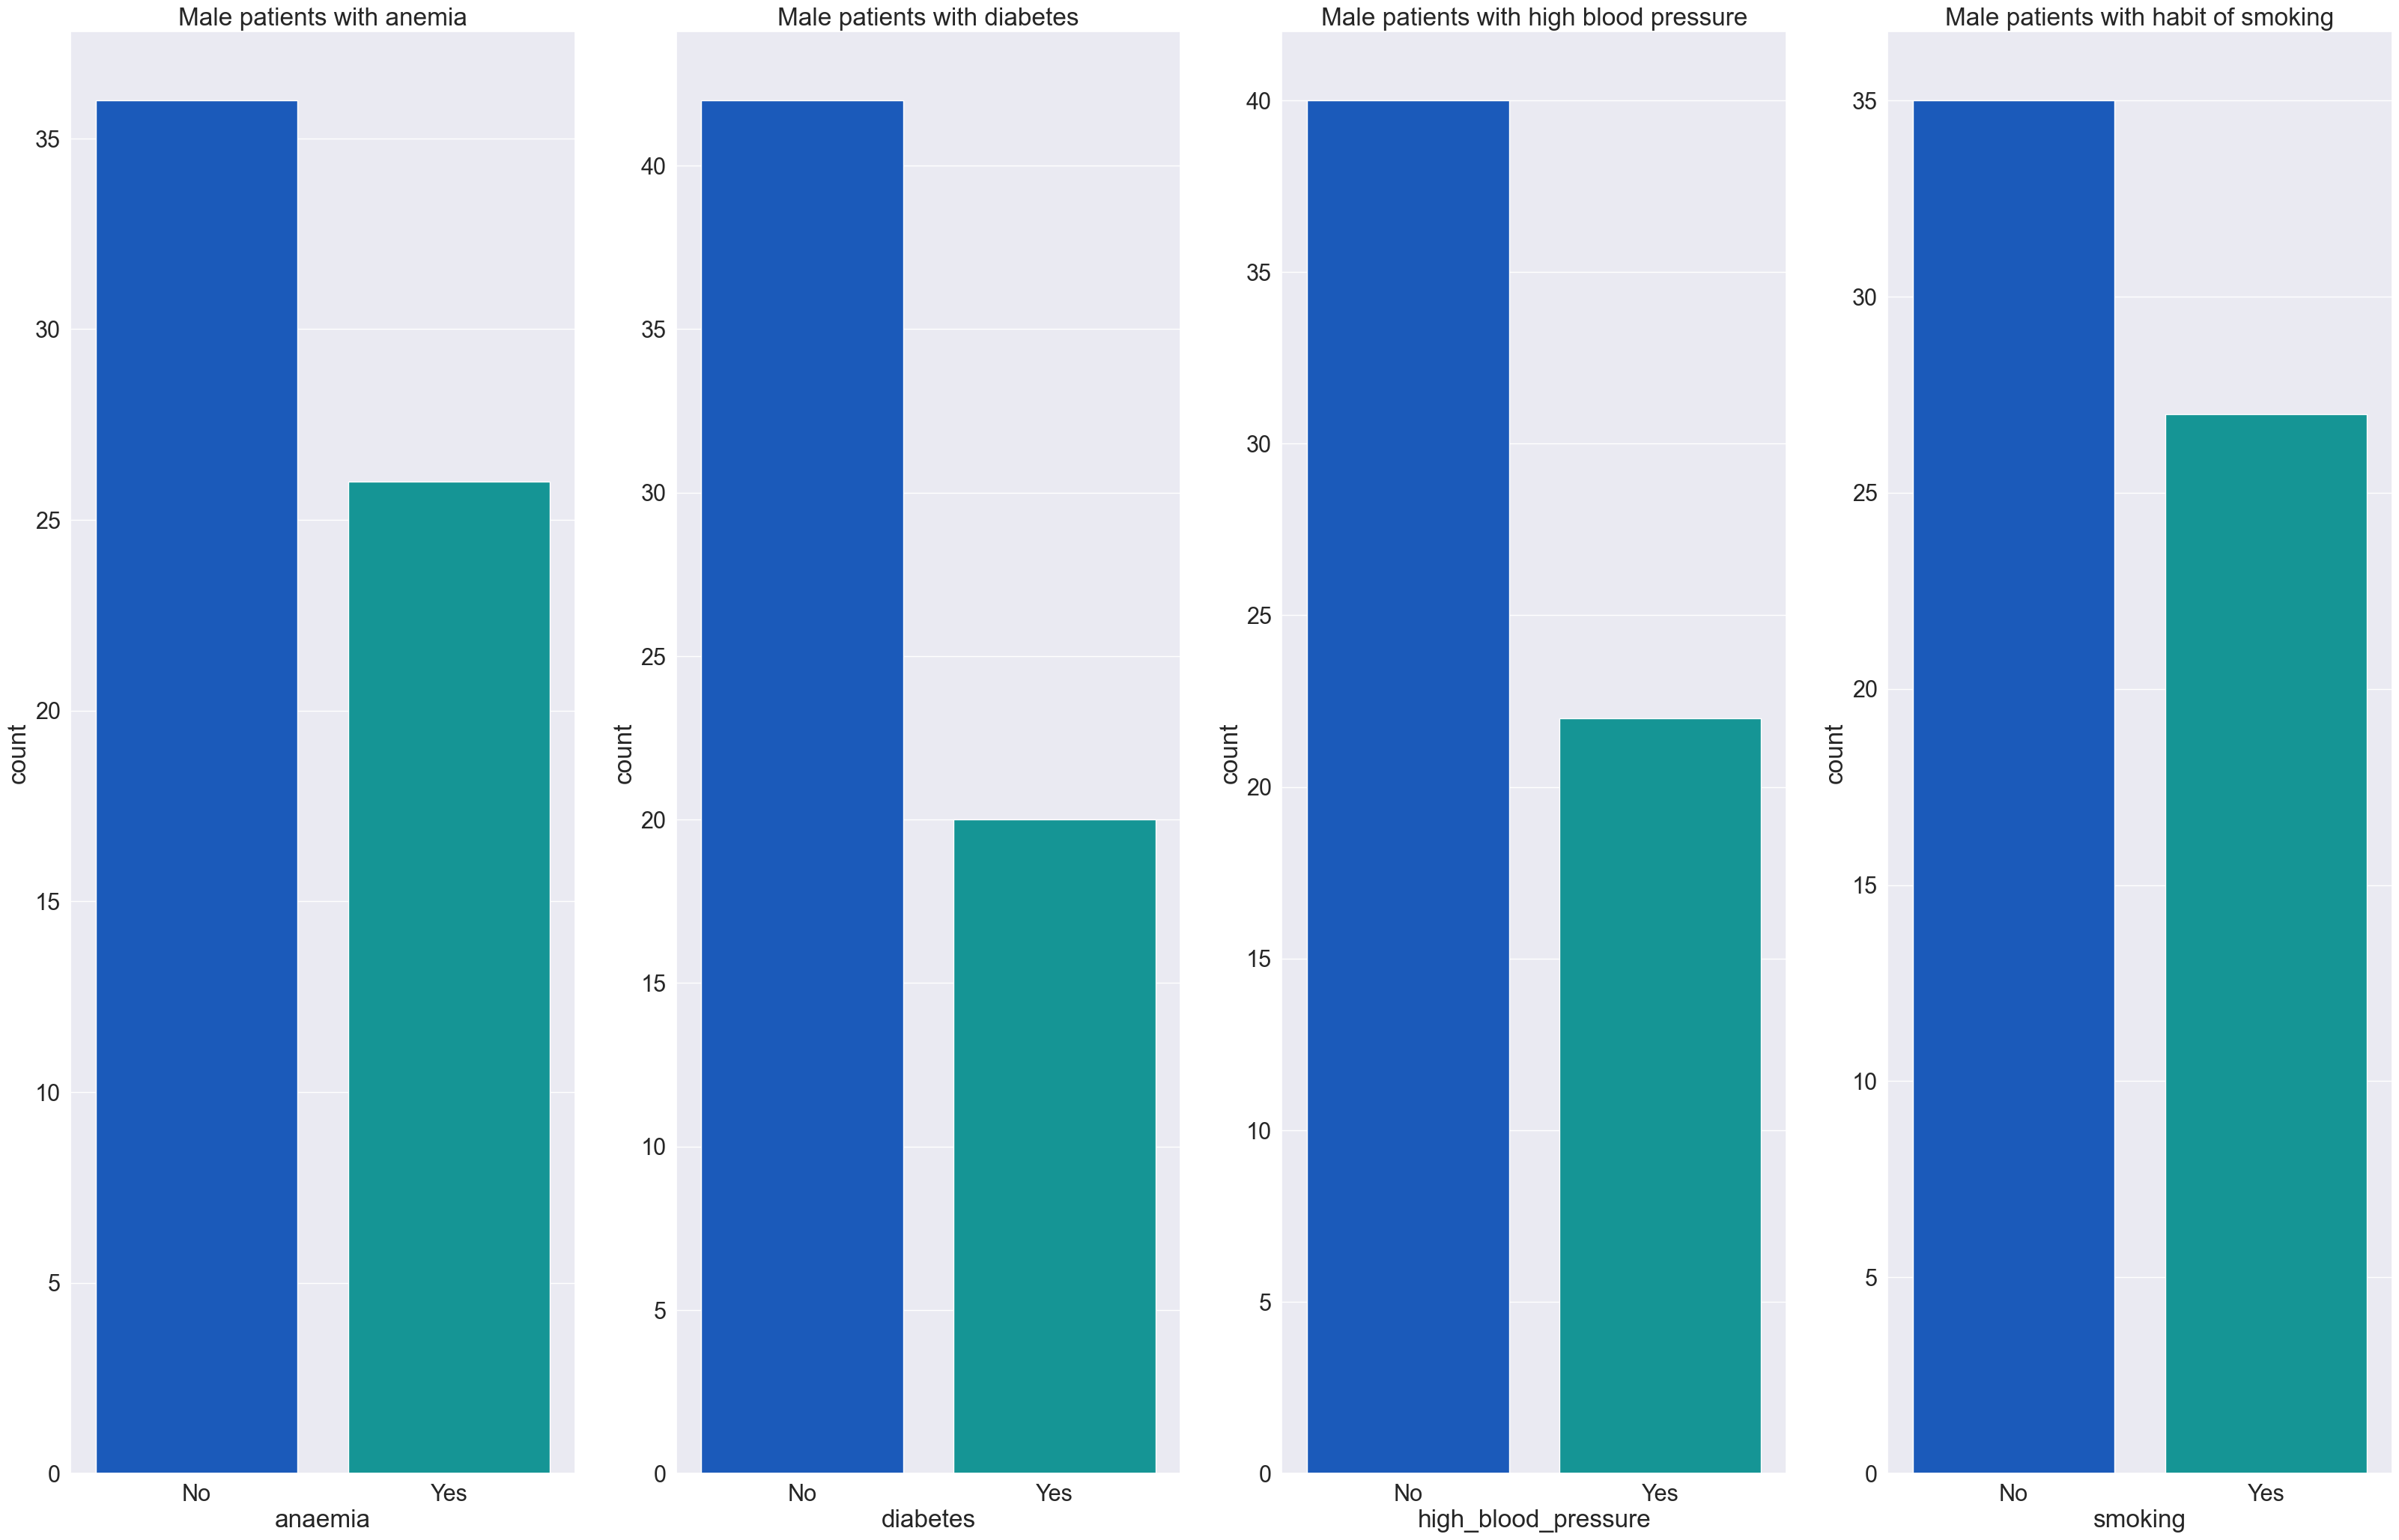

In [22]:
# Create Bar Charts
sns.set(font_scale=2)
fig, ax = plt.subplots(1,4, sharex=True, figsize=(40,25))
sns.countplot(ax=ax[0],x=df_male['anaemia'], palette='winter')
ax[0].set_title('Male patients with anemia')
sns.countplot(ax=ax[1],x=df_male['diabetes'], palette='winter')
ax[1].set_title('Male patients with diabetes')
sns.countplot(ax=ax[2],x=df_male['high_blood_pressure'], palette='winter')
ax[2].set_title('Male patients with high blood pressure')
sns.countplot(ax=ax[3],x=df_male['smoking'], palette='winter')
ax[3].set_title('Male patients with habit of smoking')


From the table and visualization above, Male patients who have __smoking habits__ have a higher chance of dying during follow up periods than any other conditions.

## Comparison between Death Event with other variables
This section describes data exploration to compare the number of patients who are still alive and died during the follow-up period with other variables in this dataset.


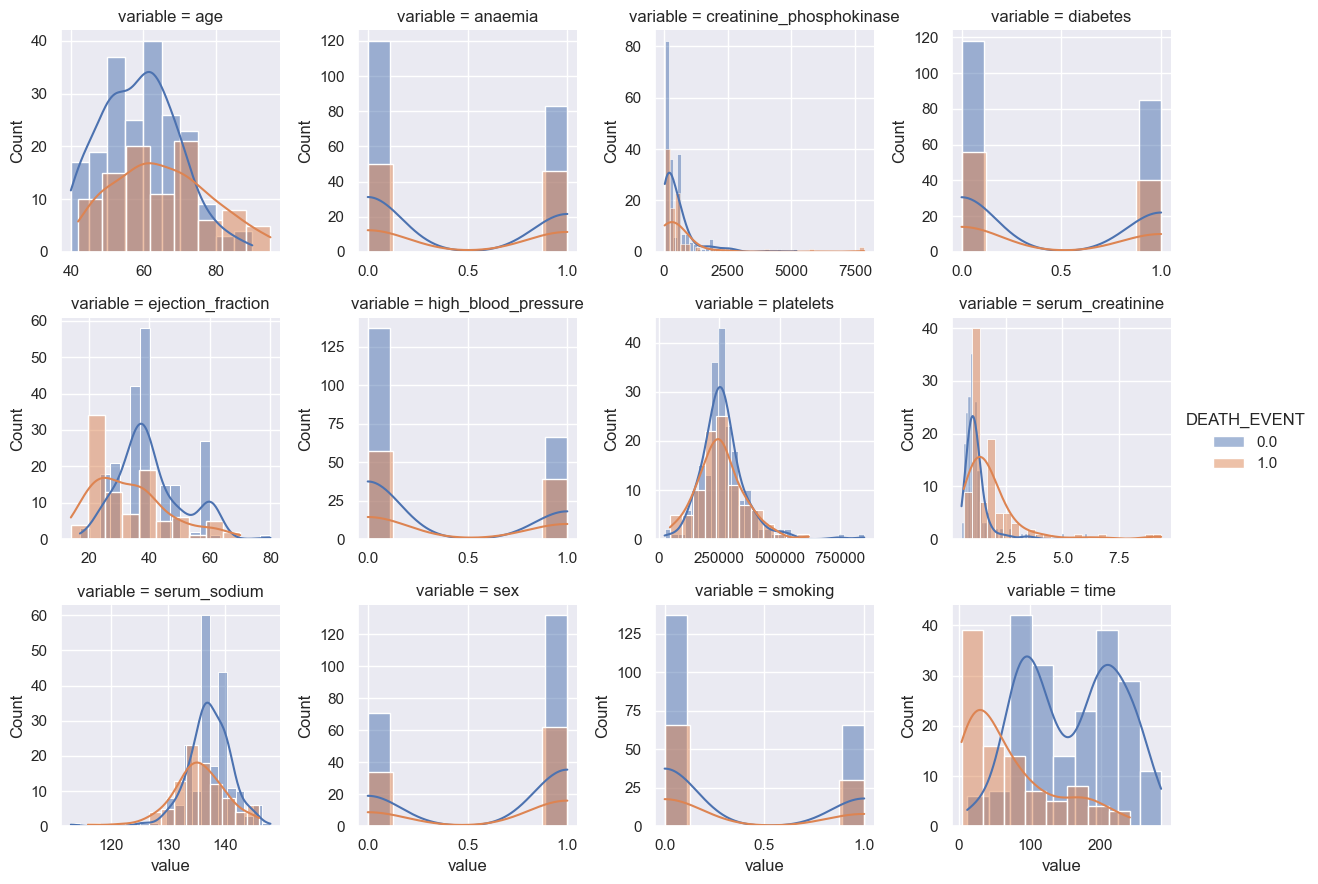

In [23]:
# Creating new dataframe for the histogram
sns.set(font_scale=1)
output = 'DEATH_EVENT'
cols = [f for f in df.columns if df.dtypes[f] != "object"]
f = pd.melt(df, id_vars=output, value_vars=cols)

# Creating histogram
g = sns.FacetGrid(f, hue=output, col="variable", col_wrap=4, sharex=False, sharey=False )
g = g.map(sns.histplot, "value", kde=True).add_legend()
     

Based on the histogram above, we can see that the distribution of __Not Death__ is still dominating that Death. However, we should check wherer variable time looks different than the others, where Death is high with time between 0-100 days. From here we should check the skewness of time as well.

## Correlation Matrix Analysis
This section explains about correlation matrix analysis to find out the correlation between features and target (`DEATH_EVENT`).

The cell below explains the process of performing a correlation matrix analysis to identify the features that are most strongly correlated with the target (`DEATH_EVENT`). To accomplish this, categorical data will be converted into numerical data using the `LabelEncoder` library.

In [24]:
# Using LabelEncoder to convert categorical into numerical data
m_LabelEncoder = LabelEncoder()

for col in df_copy[categorical]:
    df_copy[col]=m_LabelEncoder.fit_transform(df_copy[col])
df_copy.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,42.0,1,250.0,1,15.0,0,213000.0,1.3,136.0,0,0,65.0,1
1,46.0,0,168.0,1,17.0,1,271000.0,2.1,124.0,0,0,100.0,1
2,65.0,1,160.0,1,20.0,0,327000.0,2.7,116.0,0,0,8.0,1
3,53.0,1,91.0,0,20.0,1,418000.0,1.4,139.0,0,0,43.0,1
4,50.0,1,582.0,1,20.0,1,279000.0,1.0,134.0,0,0,186.0,0


<Axes: >

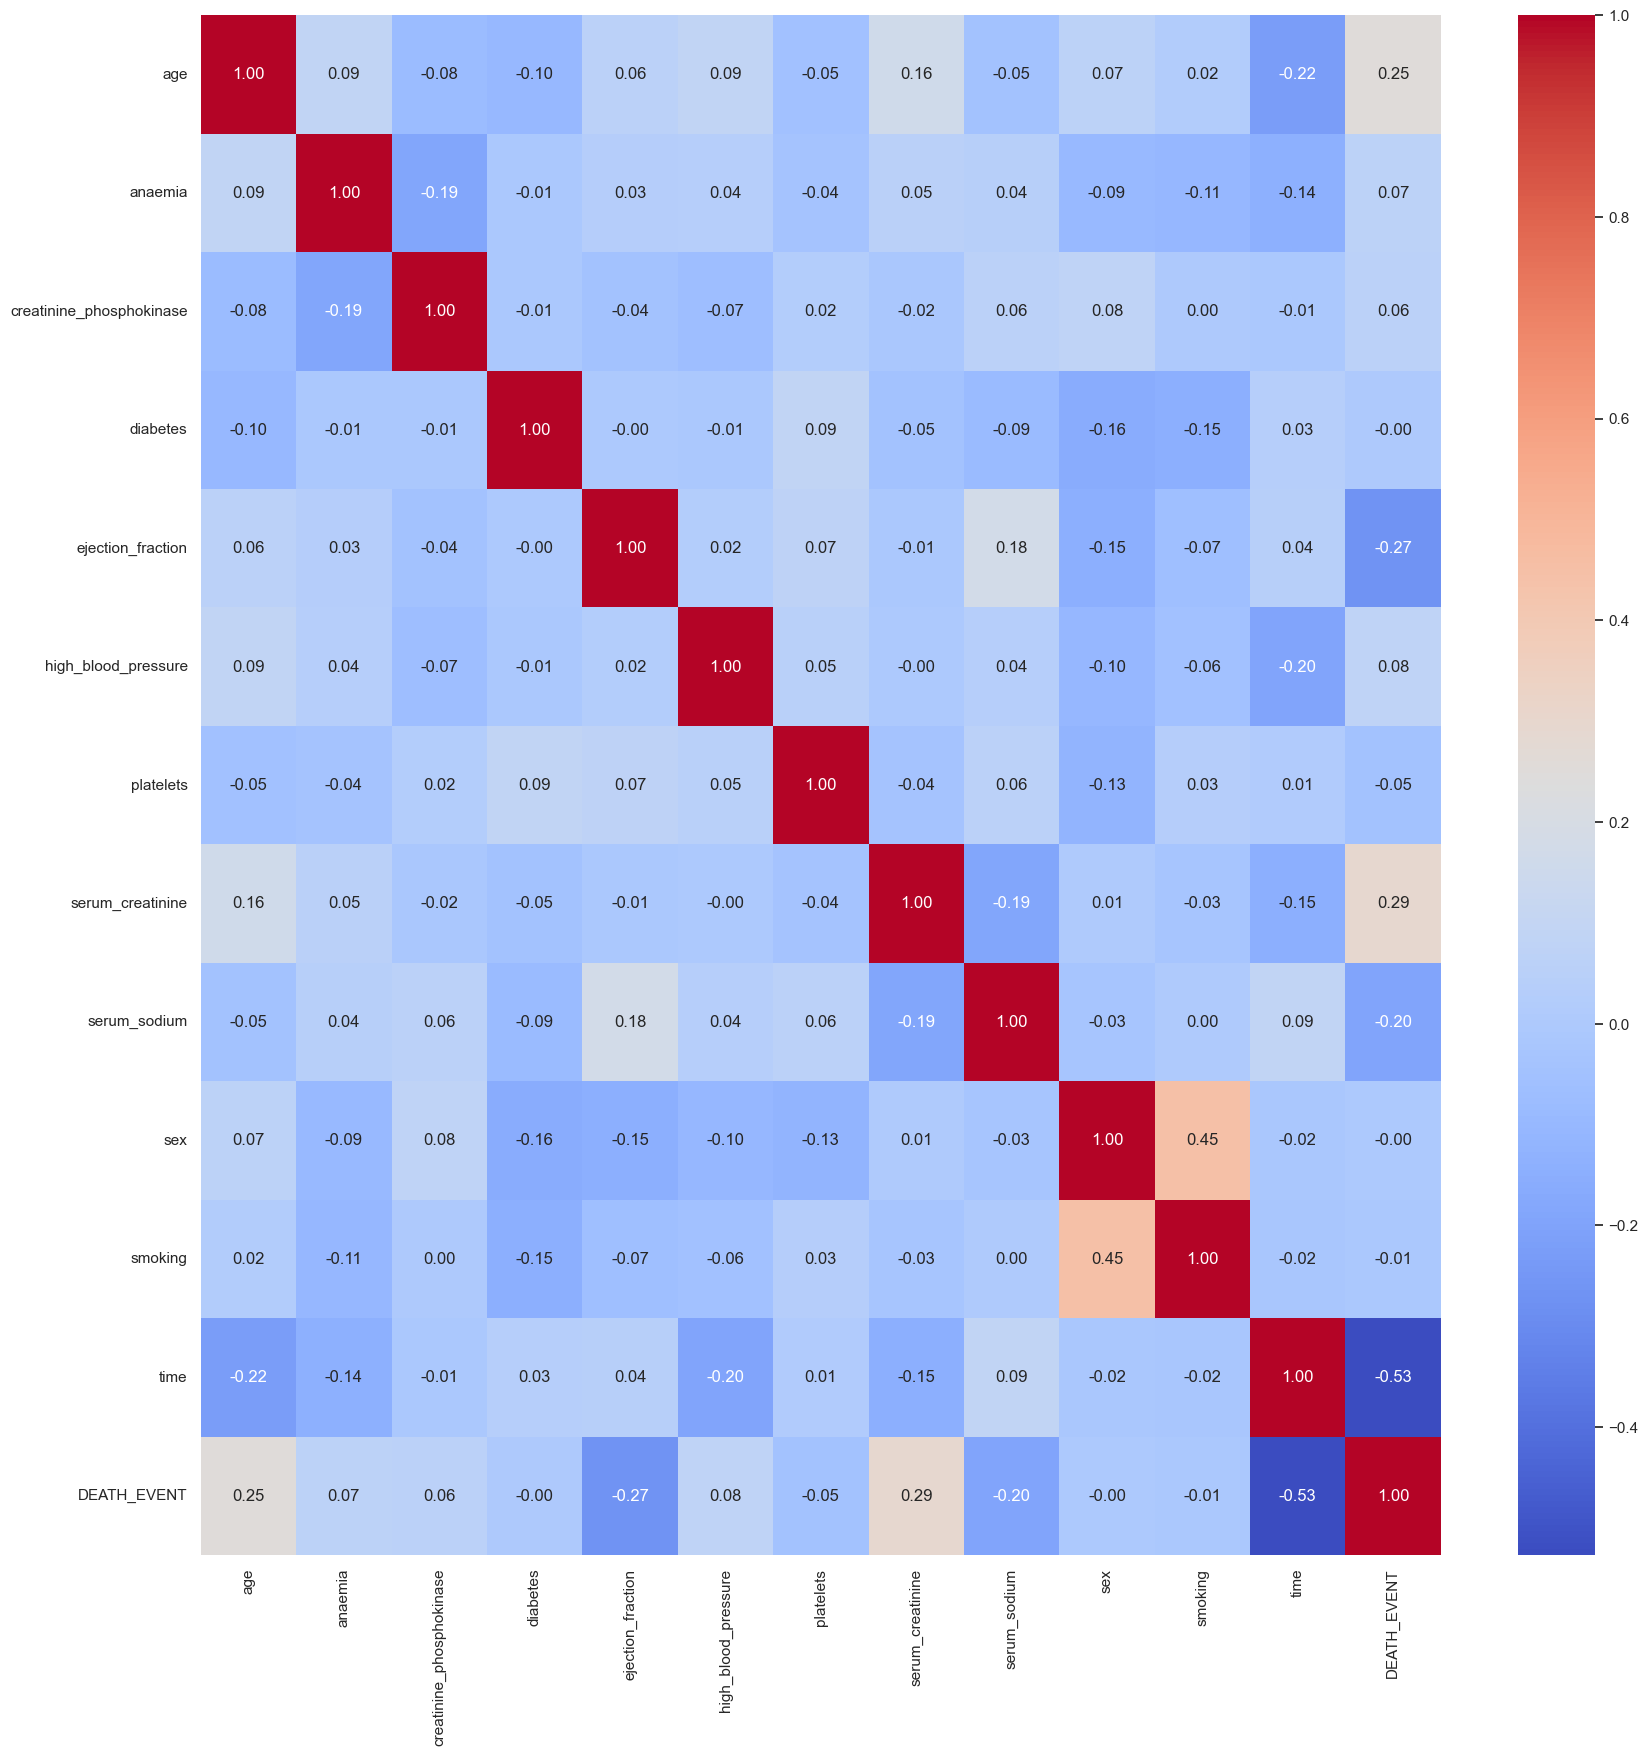

In [25]:
# Plotting Correlation Matrix of Features and DEATH_EVENT
sns.set(font_scale=1)
plt.figure(figsize=(20,20))
sns.heatmap(df_copy.corr(),annot=True,cmap='coolwarm', fmt='.2f')

In [26]:
# Get List of All Correlation

final_column = df.corr()['DEATH_EVENT'] >= 0.05
final_column = final_column[final_column==True]
final_column

age                         True
anaemia                     True
creatinine_phosphokinase    True
high_blood_pressure         True
serum_creatinine            True
DEATH_EVENT                 True
Name: DEATH_EVENT, dtype: bool

In [27]:
# Get List of All Correlation

final_column2 = df.corr()['DEATH_EVENT'] <= -0.05
final_column2 = final_column2[final_column2==True]
final_column2

ejection_fraction    True
serum_sodium         True
time                 True
Name: DEATH_EVENT, dtype: bool

Based on visualization above, the `education_level`, `sex`, `marital_status` has a low correlation to the target (`DEATH_EVENT`).

---

# vi. Feature Engineering / Data Preprocessing

> This section explains the process of preparing data for the model training process, such as data cleaning, creating data inference, separating data into train-tests, data transformation (normalization, encoding, etc.), and other processes needed.

## Data Inference
This section explains how to create a data inference. Data inference is distinct from the train and test set, as it is still based on the original dataset and used to evaluate the model's performance on new, raw data. To create the data inference, we will set aside 10 data from the original dataset.

In [28]:
# Creating data inference
data = df.copy()
df_inf = data.sample(10, random_state=0).sort_index()
print('size of data inference (rows,columns) : ',df_inf.shape)
df_inf.reset_index(drop=True).head(10)

size of data inference (rows,columns) :  (10, 13)


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,65.0,0.0,56.0,0.0,25.0,0.0,237000.00,5.00,130.0,0.0,0.0,207.0,0.0
1,67.0,0.0,213.0,0.0,38.0,0.0,215000.00,1.20,133.0,0.0,0.0,245.0,0.0
2,75.0,0.0,582.0,0.0,20.0,1.0,265000.00,1.90,130.0,1.0,0.0,4.0,1.0
3,72.0,1.0,943.0,0.0,25.0,1.0,338000.00,1.70,139.0,1.0,1.0,111.0,1.0
4,65.0,0.0,198.0,1.0,35.0,1.0,281000.00,0.90,137.0,1.0,1.0,146.0,0.0
5,55.0,0.0,7861.0,0.0,38.0,0.0,263358.03,1.10,136.0,1.0,0.0,6.0,1.0
6,75.0,1.0,81.0,0.0,38.0,1.0,368000.00,4.00,131.0,1.0,1.0,10.0,1.0
7,53.0,1.0,707.0,0.0,38.0,0.0,330000.00,1.40,137.0,1.0,1.0,209.0,0.0
8,62.0,0.0,61.0,1.0,38.0,1.0,155000.00,1.10,143.0,1.0,1.0,270.0,0.0
9,75.0,0.0,582.0,0.0,40.0,0.0,263358.03,1.18,137.0,1.0,0.0,107.0,0.0


In [29]:
# Saving data inference as .csv file
df_inf.to_csv('inference.csv')

In [30]:
# Removing inference from dataset 
df_train_test = data.drop(df_inf.index)
print('size of original dataset (rows,columns) :',data.shape)
print('size of dataset after data inference is removed (rows,columns) :',df_train_test.shape)
df_train_test.head()

size of original dataset (rows,columns) : (299, 13)
size of dataset after data inference is removed (rows,columns) : (289, 13)


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,42.0,1.0,250.0,1.0,15.0,0.0,213000.0,1.3,136.0,0.0,0.0,65.0,1.0
1,46.0,0.0,168.0,1.0,17.0,1.0,271000.0,2.1,124.0,0.0,0.0,100.0,1.0
2,65.0,1.0,160.0,1.0,20.0,0.0,327000.0,2.7,116.0,0.0,0.0,8.0,1.0
3,53.0,1.0,91.0,0.0,20.0,1.0,418000.0,1.4,139.0,0.0,0.0,43.0,1.0
4,50.0,1.0,582.0,1.0,20.0,1.0,279000.0,1.0,134.0,0.0,0.0,186.0,0.0


## Separating Dataset into Training Set and Testing Set

This section explains how to separate dataset into training set and testing set.

In [31]:
# Defining X and y (removing unnecesary features)
X = df_train_test.drop(['DEATH_EVENT'],axis=1)
y = pd.DataFrame(df_train_test['DEATH_EVENT'])
X

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,42.0,1.0,250.0,1.0,15.0,0.0,213000.00,1.3,136.0,0.0,0.0,65.0
1,46.0,0.0,168.0,1.0,17.0,1.0,271000.00,2.1,124.0,0.0,0.0,100.0
2,65.0,1.0,160.0,1.0,20.0,0.0,327000.00,2.7,116.0,0.0,0.0,8.0
3,53.0,1.0,91.0,0.0,20.0,1.0,418000.00,1.4,139.0,0.0,0.0,43.0
4,50.0,1.0,582.0,1.0,20.0,1.0,279000.00,1.0,134.0,0.0,0.0,186.0
...,...,...,...,...,...,...,...,...,...,...,...,...
294,63.0,1.0,122.0,1.0,60.0,0.0,267000.00,1.2,145.0,1.0,0.0,147.0
295,45.0,0.0,308.0,1.0,60.0,1.0,377000.00,1.0,136.0,1.0,0.0,186.0
296,70.0,0.0,97.0,0.0,60.0,1.0,220000.00,0.9,138.0,1.0,0.0,186.0
297,53.0,1.0,446.0,0.0,60.0,1.0,263358.03,1.0,139.0,1.0,0.0,215.0


## Separating Dataset into Training Set and Testing Set

This section explains how to separate dataset into training set and testing set.

In [32]:
# Separating Dataset into Training Set and Testing Set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,  # features
                                                   y, # target = death event
                                                   test_size=0.3, # test_set 30%
                                                   random_state=0) 

print('Train Size: ', X_train.shape)
print('Test Size: ', X_test.shape)
X_train = X_train.sort_index()
X_train

Train Size:  (202, 12)
Test Size:  (87, 12)


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,42.0,1.0,250.0,1.0,15.0,0.0,213000.00,1.3,136.0,0.0,0.0,65.0
1,46.0,0.0,168.0,1.0,17.0,1.0,271000.00,2.1,124.0,0.0,0.0,100.0
2,65.0,1.0,160.0,1.0,20.0,0.0,327000.00,2.7,116.0,0.0,0.0,8.0
3,53.0,1.0,91.0,0.0,20.0,1.0,418000.00,1.4,139.0,0.0,0.0,43.0
4,50.0,1.0,582.0,1.0,20.0,1.0,279000.00,1.0,134.0,0.0,0.0,186.0
...,...,...,...,...,...,...,...,...,...,...,...,...
289,64.0,0.0,1610.0,0.0,60.0,0.0,242000.00,1.0,137.0,1.0,0.0,113.0
290,62.0,0.0,30.0,1.0,60.0,1.0,244000.00,0.9,139.0,1.0,0.0,117.0
294,63.0,1.0,122.0,1.0,60.0,0.0,267000.00,1.2,145.0,1.0,0.0,147.0
296,70.0,0.0,97.0,0.0,60.0,1.0,220000.00,0.9,138.0,1.0,0.0,186.0


In [33]:
# X_test set
X_test = X_test.sort_index()
X_test

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
5,70.0,1.0,125.0,0.0,25.0,1.0,237000.00,1.00,140.0,0.0,0.0,15.0
7,70.0,0.0,161.0,0.0,25.0,0.0,244000.00,1.20,142.0,0.0,0.0,66.0
8,60.0,1.0,76.0,1.0,25.0,0.0,196000.00,2.50,132.0,0.0,0.0,77.0
13,72.0,0.0,211.0,0.0,25.0,0.0,274000.00,1.20,134.0,0.0,0.0,207.0
16,75.0,0.0,582.0,1.0,30.0,1.0,263358.03,1.83,134.0,0.0,0.0,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...
291,53.0,0.0,196.0,0.0,60.0,0.0,220000.00,0.70,133.0,1.0,1.0,134.0
292,70.0,1.0,171.0,0.0,60.0,1.0,176000.00,1.10,145.0,1.0,1.0,146.0
293,60.0,1.0,95.0,0.0,60.0,0.0,337000.00,1.00,138.0,1.0,1.0,146.0
295,45.0,0.0,308.0,1.0,60.0,1.0,377000.00,1.00,136.0,1.0,0.0,186.0


In [34]:
# y_train set
y_train = y_train.sort_index()
y_train

,DEATH_EVENT
0,1.0
1,1.0
2,1.0
3,1.0
4,0.0
...,...
289,0.0
290,0.0
294,0.0
296,0.0


In [35]:
# y_test set
y_test = y_test.sort_index()
y_test

,DEATH_EVENT
5,1.0
7,1.0
8,1.0
13,0.0
16,1.0
...,...
291,0.0
292,0.0
293,0.0
295,0.0


## Check the distribution of data
This section explains how to check the distribution of the data. The histogram and boxplot visualizations below show the distribution of numerical data in the train set.

In [36]:
# numerical columns
num_col = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']

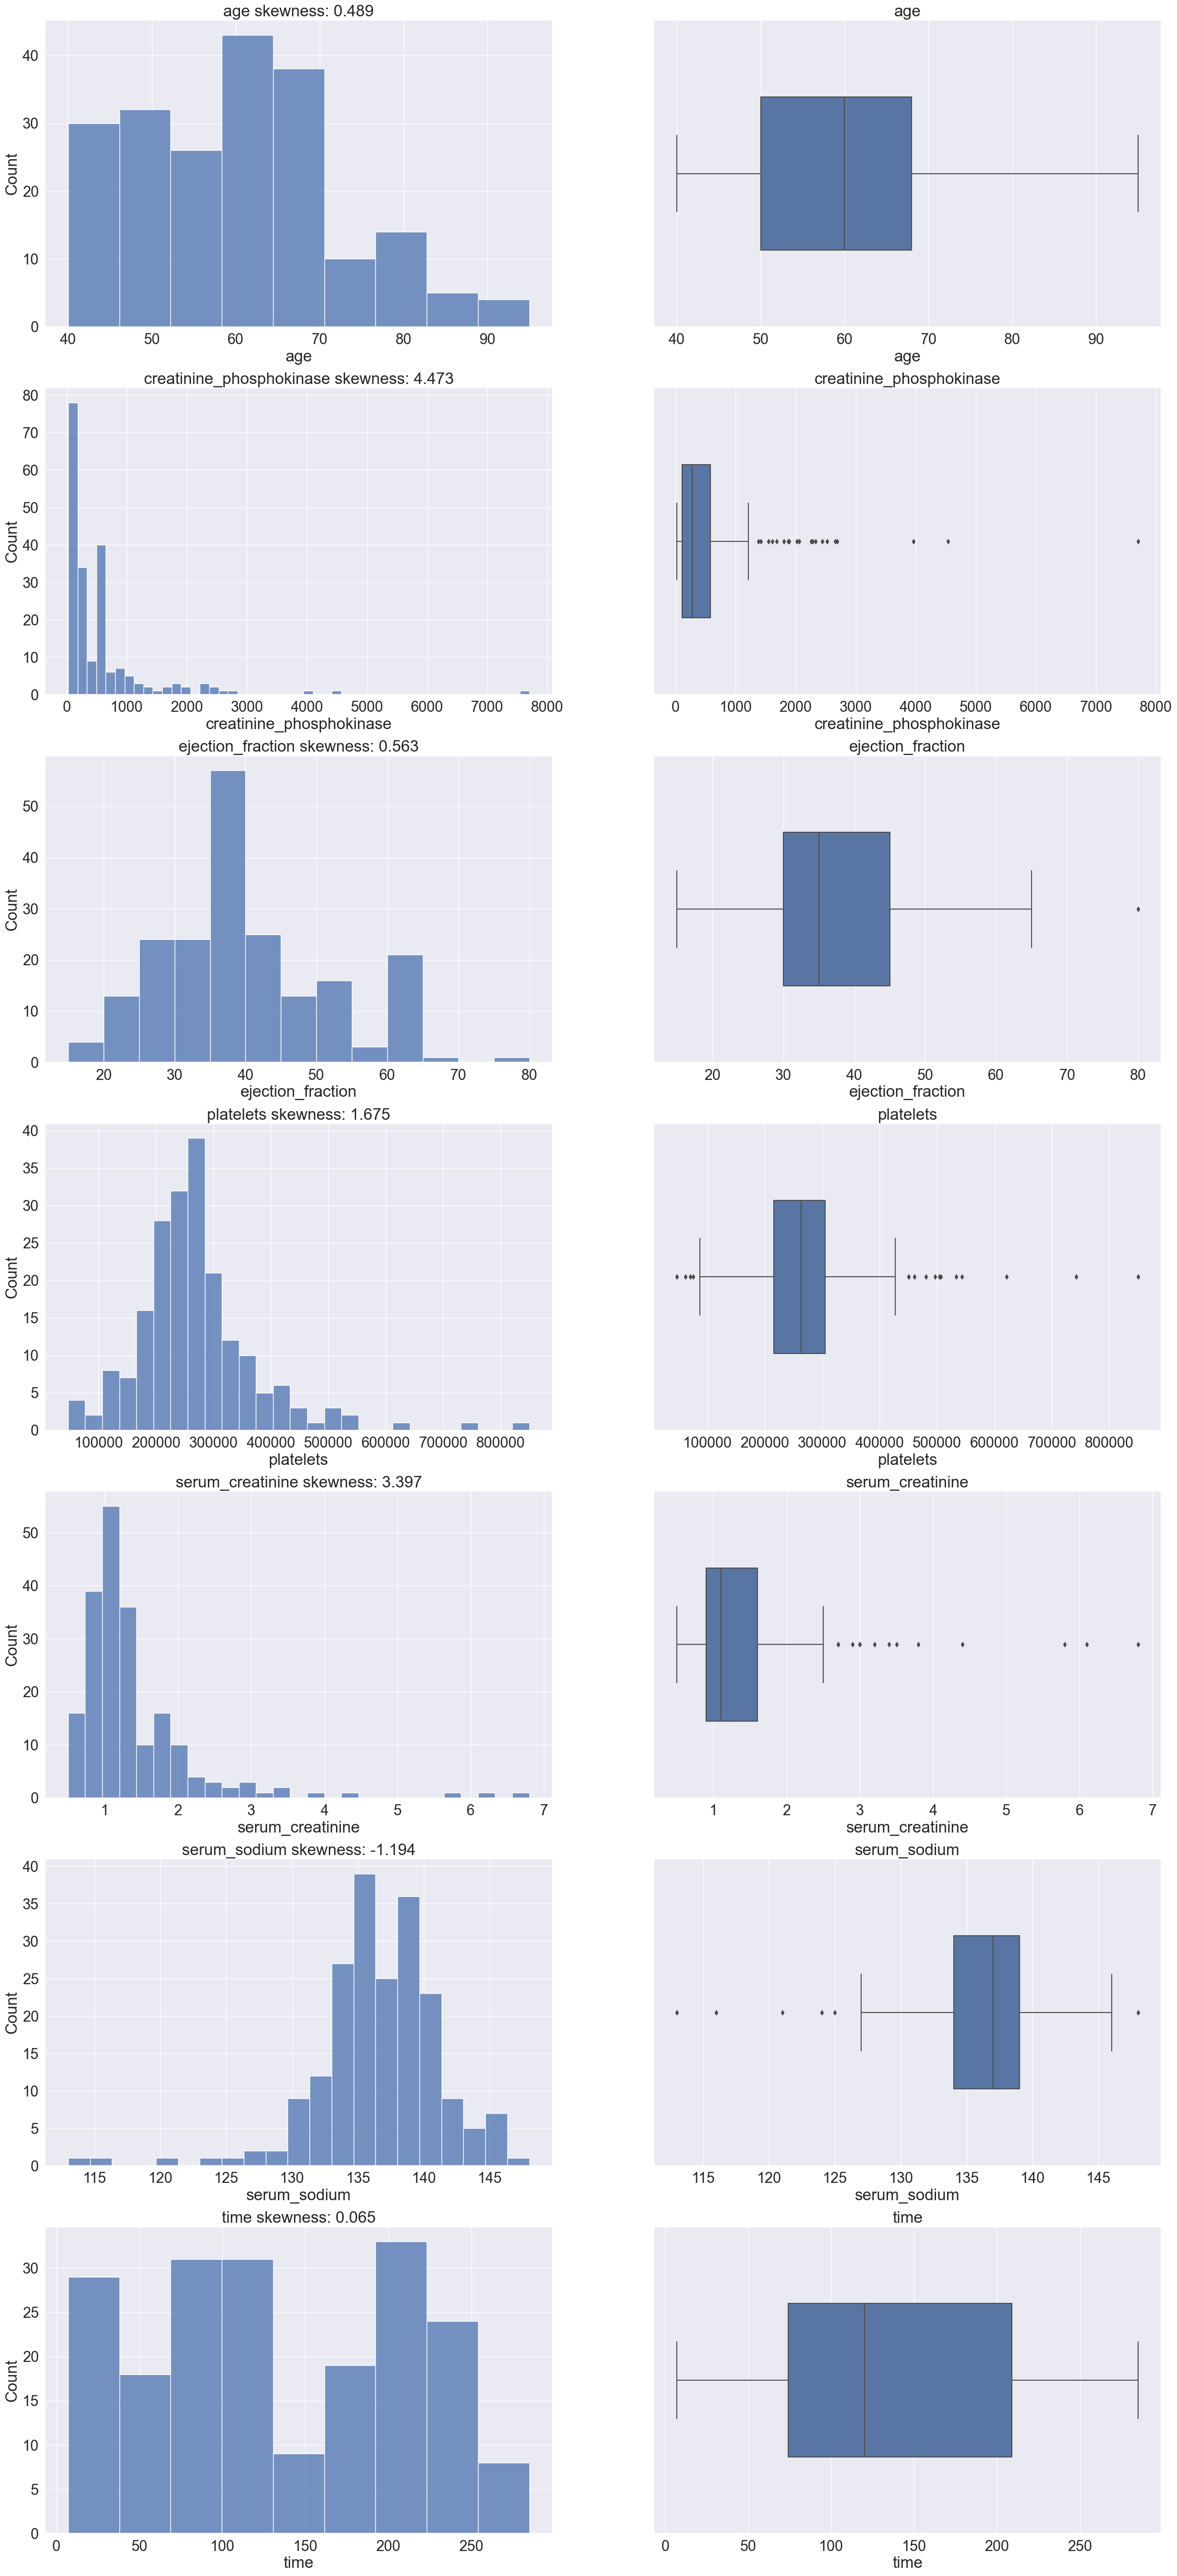

In [37]:
# plot histogram and boxplot
# numerical columns
num = X_train[num_col]
n=len(num.columns)
sns.set(font_scale=2)
fig, ax = plt.subplots(n,2,figsize=(30,68))
for i in range(n):
    col = num.columns[i]
    skewness = X_train[col].skew()
    sns.histplot(ax=ax[i,0],data=X_train[col])
    ax[i, 0].set_title(f'{col} skewness: {skewness:.3f}')
    sns.boxplot(ax=ax[i,1],data=X_train,x=X_train[col],width=0.50)
    ax[i,1].set_title(col)

In [38]:
# Create Function to calculate skewness
def skewness(df,col):
  skewness = df[col].skew()
  if skewness>=-0.5 and skewness<=0.5:
    print(f'Disribution of {col} : Normal Distribution')
  else:
    print(f'Disribution of {col} : Skewed Distribution')

In [39]:
# Distribution
num = X_train[num_col]
n=len(num.columns)

for i in range(n):
    col = num.columns[i]
    skewness(X_train,col)

Disribution of age : Normal Distribution
Disribution of creatinine_phosphokinase : Skewed Distribution
Disribution of ejection_fraction : Skewed Distribution
Disribution of platelets : Skewed Distribution
Disribution of serum_creatinine : Skewed Distribution
Disribution of serum_sodium : Skewed Distribution
Disribution of time : Normal Distribution


### Handling Outliers
This section explains how to handle outliers in the train and test set.

In [40]:
# Create Function
def outlier_analysis(df,col):
  skewness = df[col].skew()
  if skewness>=-0.5 and skewness<=0.5:
    upper = df[col].mean() + 3*X_train[col].std()
    lower = df[col].mean() - 3*X_train[col].std()
  else:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    upper = Q3 + (1.5 * IQR)
    lower = Q1 - (1.5 * IQR)
    
  no_outliers = df[(df[col]>=lower) &  (df[col]<=upper)]
  outliers = df[(df[col]>upper ) | (df[col]<lower) ]

  return outliers,no_outliers, upper, lower

#### Handling Outliers in Train set

In [41]:
# percentage of outlier in train set
num = X_train[num_col]
n=len(num.columns)

for i in range(n):
    col = num.columns[i]
    out,no_out, up, low = outlier_analysis (X_train,col)
    print(f'column name: {col}')
    print('count of outlier: ', len(out))
    print('percentage of outlier: ', (len(out)/len(X_train))*100, '%') 
    print('-'*20)

column name: age
count of outlier:  0
percentage of outlier:  0.0 %
--------------------
column name: creatinine_phosphokinase
count of outlier:  20
percentage of outlier:  9.900990099009901 %
--------------------
column name: ejection_fraction
count of outlier:  1
percentage of outlier:  0.49504950495049505 %
--------------------
column name: platelets
count of outlier:  16
percentage of outlier:  7.920792079207921 %
--------------------
column name: serum_creatinine
count of outlier:  13
percentage of outlier:  6.435643564356436 %
--------------------
column name: serum_sodium
count of outlier:  6
percentage of outlier:  2.9702970297029703 %
--------------------
column name: time
count of outlier:  0
percentage of outlier:  0.0 %
--------------------


For columns with an outlier percentage less than 1%, handling outliers will be done using trimming, the rest will be handled using capping.

In [42]:
# handling outlier in train set
X_train_trimmed = X_train.copy()
y_train_trimmed = y_train.copy()

num = X_train[num_col]
n=len(num.columns)
for i in range(n):
  col = num.columns[i]
  out,no_out, up, low = outlier_analysis(X_train_trimmed,col)
  pct_out = (len(out)/len(X_train))*100

  if pct_out <= 1: # outliers below 1% will be removed
    X_train_trimmed = X_train_trimmed[(X_train_trimmed[col]>=low) & (X_train_trimmed[col]<=up)]
    y_train_trimmed.drop(index = out.index,inplace=True)

print(f"Size of X_train set - before outlier handling: {len(X_train)}") 
print(f"Size of X_train set - after outlier handling: {len(X_train_trimmed)}")
print(f"Size of y_train set - before outlier handling: {len(y_train)}") 
print(f"Size of y_train set - after outlier handling: {len(y_train_trimmed)}")

Size of X_train set - before outlier handling: 202
Size of X_train set - after outlier handling: 201
Size of y_train set - before outlier handling: 202
Size of y_train set - after outlier handling: 201


In [43]:
# capping outlier if exist and in large proportion
wins = Winsorizer(capping_method='iqr', tail='both', fold=1.5, variables=num_col)
X_train_capped = wins.fit_transform(X_train_trimmed)
print('Size of dataset - After Capped  : ', X_train_capped.shape)

Size of dataset - After Capped  :  (201, 12)


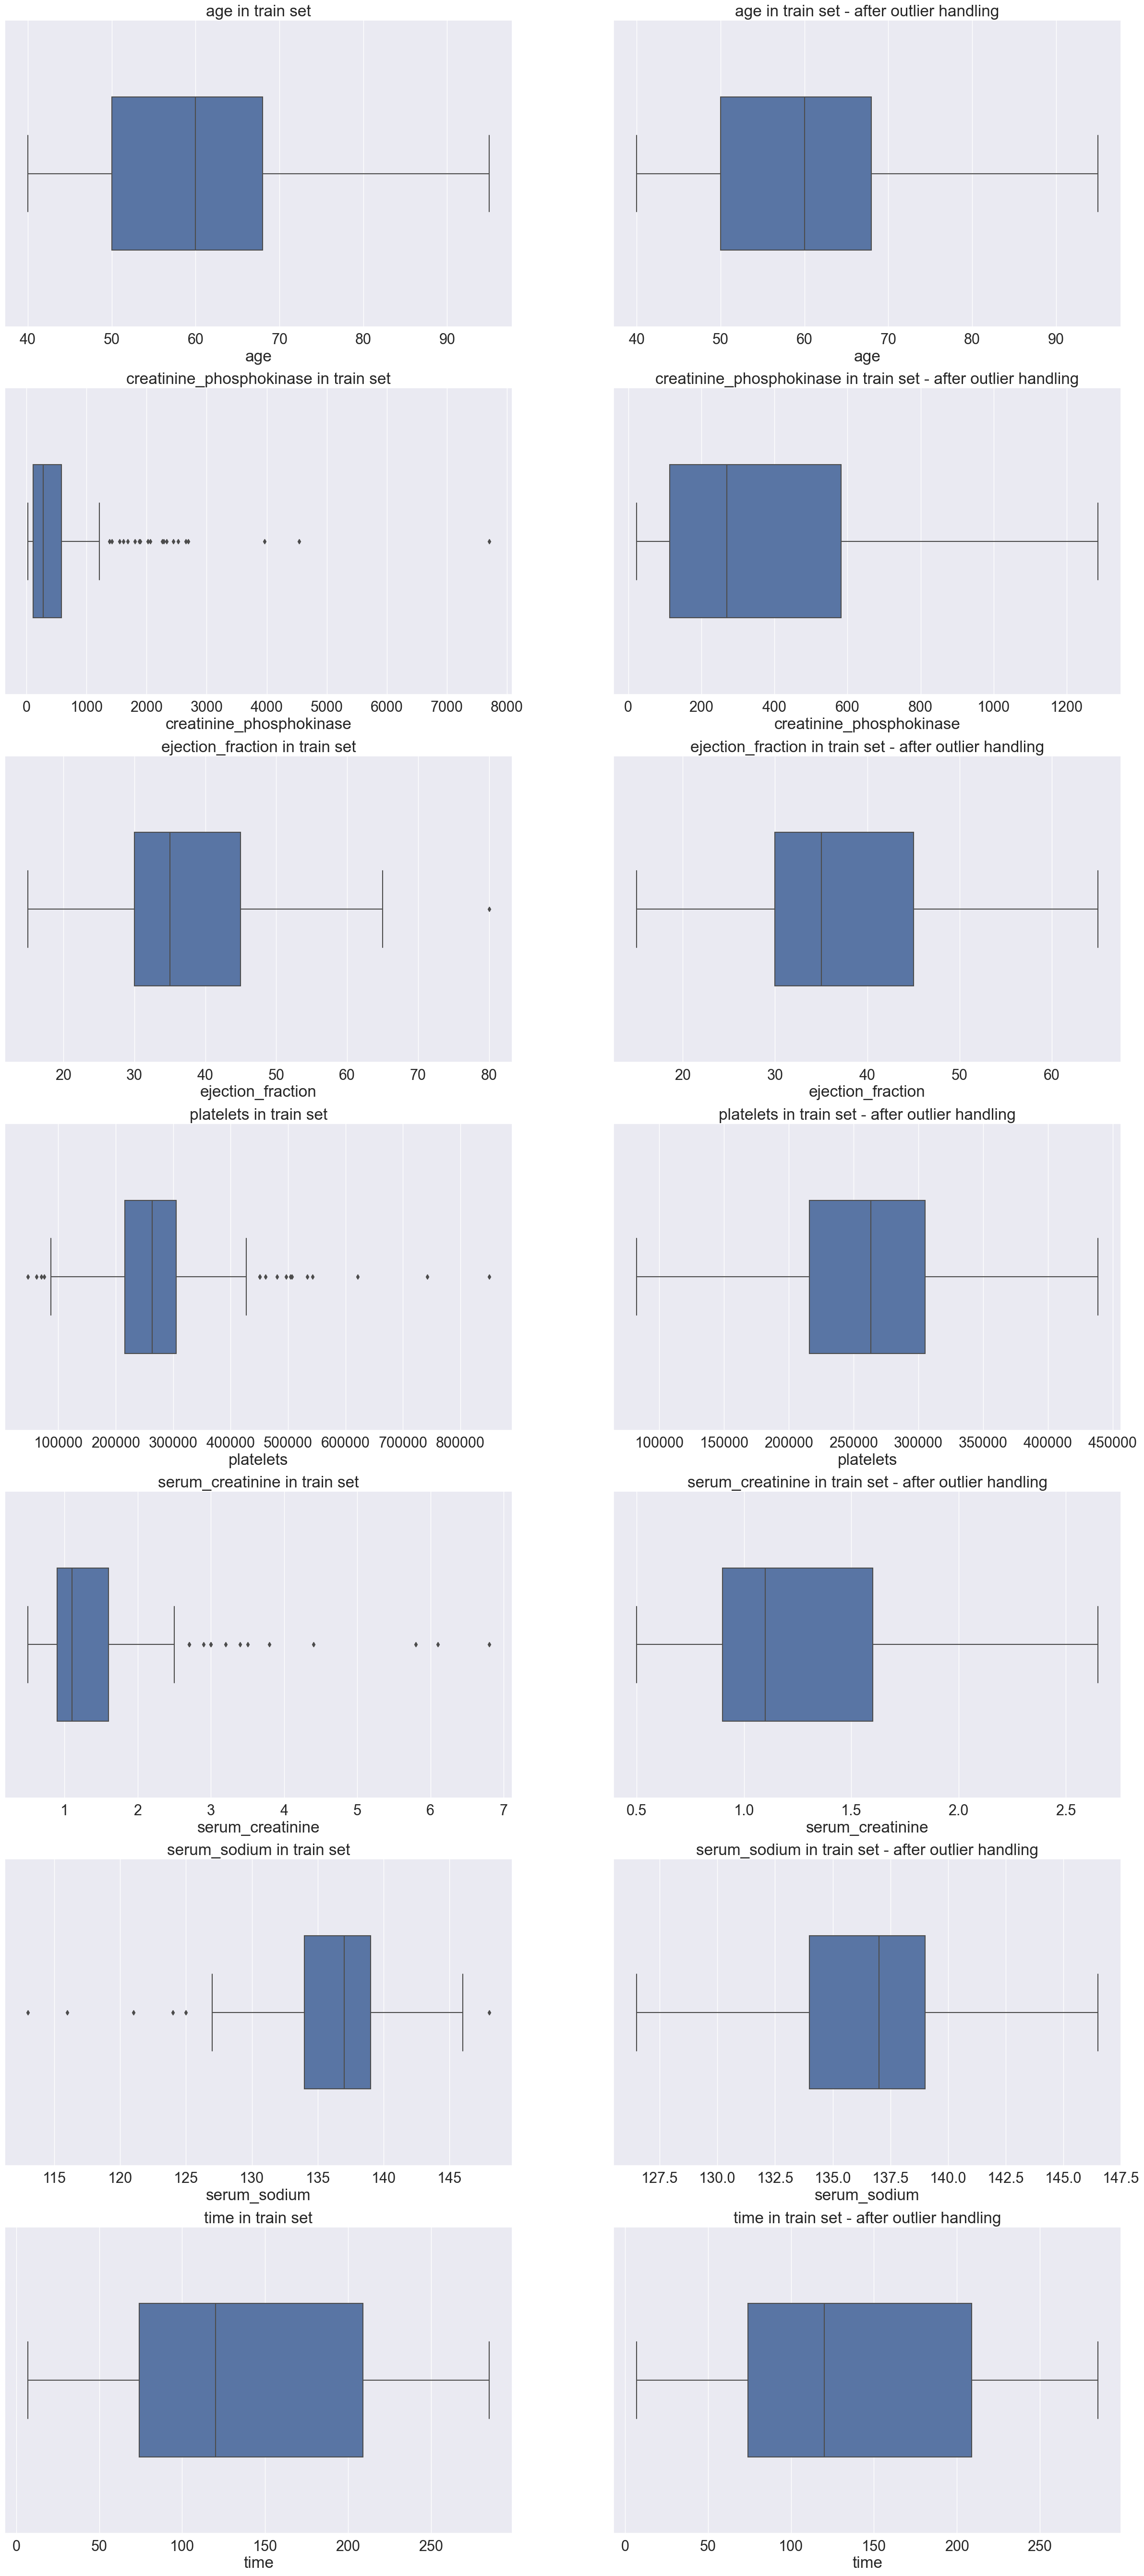

In [44]:
# Boxplot visualization
num = X_train[num_col]
n=len(num.columns)
sns.set(font_scale=2)
fig, ax = plt.subplots(n,2,figsize=(30,68))
for i in range(n):
    col = num.columns[i]
    sns.boxplot(ax=ax[i,0],data=X_train,x=X_train[col],width=0.50)
    ax[i,0].set_title(f'{col} in train set')
    sns.boxplot(ax=ax[i,1],data=X_train_capped,x=X_train_capped[col],width=0.50)
    ax[i,1].set_title(f'{col} in train set - after outlier handling')

## Feature Selection
This section explains the process of creating a model with feature selection.

In [45]:
# check feature importances
#create classifier with n estimator = 100
featimpt = RandomForestClassifier(n_estimators= 100, random_state=15)

#fit to the data
featimpt.fit(X_train_capped,y_train_trimmed)

#simpan hasil dan buat menjadi dataframe
scorepercolumn = pd.Series(featimpt.feature_importances_, index = X_train.columns)
scorepercolumn.sort_values(ascending=False)

time                        0.282017
serum_creatinine            0.156620
ejection_fraction           0.133077
platelets                   0.126706
creatinine_phosphokinase    0.082254
serum_sodium                0.071084
age                         0.070825
sex                         0.019153
high_blood_pressure         0.015551
diabetes                    0.014901
smoking                     0.014091
anaemia                     0.013720
dtype: float64

Because all categorical features have low scores, these features will not be used in modeling.

In [46]:
# Drop Unnecessary Features
Drop_Columns = ['sex','high_blood_pressure','diabetes','smoking','anaemia']
X_train_final = X_train_capped.drop(Drop_Columns,axis=1).sort_index()
X_test_final = X_test.drop(Drop_Columns,axis=1).sort_index()
y_train_final= y_train_trimmed
y_test_final= y_test
X_train_final


,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
0,42.0,250.0,15.0,213000.00,1.30,136.0,65.0
1,46.0,168.0,17.0,271000.00,2.10,126.5,100.0
2,65.0,160.0,20.0,327000.00,2.65,126.5,8.0
3,53.0,91.0,20.0,418000.00,1.40,139.0,43.0
4,50.0,582.0,20.0,279000.00,1.00,134.0,186.0
...,...,...,...,...,...,...,...
289,64.0,1285.5,60.0,242000.00,1.00,137.0,113.0
290,62.0,30.0,60.0,244000.00,0.90,139.0,117.0
294,63.0,122.0,60.0,267000.00,1.20,145.0,147.0
296,70.0,97.0,60.0,220000.00,0.90,138.0,186.0


---

# vii. Model Definition
> This section contains cells to define the model. The algorithms that will be used are :

## Check whether the dataset is imbalance

In [47]:
# check target in train set
y_train_final.value_counts()

DEATH_EVENT
0.0            141
1.0             60
dtype: int64

Because the dataset is imbalance, the imbalance handling is carried out using __SMOTE__ from the `imbalanced-learn` library.

In [48]:
# handling imbalance with SMOTE
smote = SMOTE(random_state=0)

## Creating Pipeline

This section contains about the creation of pipelines

In [49]:
# numerical and categorical columns
num_skewcols = ['creatinine_phosphokinase','ejection_fraction', 'platelets', 'serum_sodium','serum_creatinine']
num_nomcols = ['age','time']

In [50]:
# Using ColumnTransformer for feature scaling
preprocess = ColumnTransformer([
    ('numskew', MinMaxScaler(),num_skewcols),
    ('numnom', StandardScaler(),num_nomcols)
])

In [51]:
# creating pipeline for RandomForestClassifier
prepmod_RF = Pipeline([
    ('preprop', preprocess),
    ('smote',smote),
    ('RFC', RandomForestClassifier(random_state=0))
    ])

In [52]:
# creating pipeline for AdaBoostClassifier
prepmod_AB = Pipeline([
    ('preprop', preprocess),
    ('smote',smote),
    ('AB', AdaBoostClassifier())
    ])

---

# viii. Model Training and Evaluation
> This section explains the process to train the model that we defined using the algorithm that has been determined in the previous chapter. Those algorithms will be checked its accuracy through cross-validation from the train dataset.

## Cross Validation

### Random Forest

In [53]:
# Random Forest
# Cross Validation using `cross_val_score` for train set
cv_rf = cross_val_score(prepmod_RF, 
                                  X_train_final, 
                                  y_train_final, 
                                  cv=5, 
                                  scoring='f1')

print("f1 Score - All - Cross Validation  :", cv_rf)
print("f1 Score - Mean - Cross-Validation :", cv_rf.mean())
print("f1 Score - Std - Cross-Validation  :", cv_rf.std())

f1 Score - All - Cross Validation  : [0.45454545 0.66666667 0.52631579 0.66666667 0.66666667]
f1 Score - Mean - Cross-Validation : 0.5961722488038277
f1 Score - Std - Cross-Validation  : 0.08927089403776484


### AdaBoost Classifier

In [54]:
# AdaBoost
# Cross Validation using `cross_val_score` for train set
cv_ada = cross_val_score(prepmod_AB, 
                                  X_train_final, 
                                  y_train_final, 
                                  cv=5, 
                                  scoring='f1')

print("f1 Score - All - Cross Validation  :", cv_ada)
print("f1 Score - Mean - Cross-Validation :", cv_ada.mean())
print("f1 Score - Std - Cross-Validation  :", cv_ada.std())

f1 Score - All - Cross Validation  : [0.52173913 0.54545455 0.66666667 0.63636364 0.69230769]
f1 Score - Mean - Cross-Validation : 0.6125063342454647
f1 Score - Std - Cross-Validation  : 0.06723897216433436


### Best Model

In [55]:
# Model Comparision based on Cross-Validation Score
crossval = [cv_rf,cv_ada]
mean = []
std = []
for i in crossval:
    mean.append(i.mean())
    std.append(i.std())
model = ['Random Forest','AdaBoost']
bestmodel = pd.DataFrame(model)
bestmodel['Mean']=np.round(mean,3)
bestmodel['Std']=np.round(std,3)
bestmodel.rename(columns={0:'Algorithm Model'},inplace = True)
bestmodel.sort_values(by= 'Mean' , ascending = False).reset_index(drop=True)

,Algorithm Model,Mean,Std
0,AdaBoost,0.613,0.067
1,Random Forest,0.596,0.089


Based on the cross-validation score, the **AdaBoost** algorithm has the highest mean score (0.613) and the lowest standard deviation score (0.067). Next, model evaluation is conducted using this algorithm.

In [56]:
# Best Model - Baseline Parameter
best_model = prepmod_AB

# Fitting AdaBoost Classifier model - Baseline Parameter
best_model.fit(X_train_final,y_train_final)

Pipeline(steps=[('preprop',
                 ColumnTransformer(transformers=[('numskew', MinMaxScaler(),
                                                  ['creatinine_phosphokinase',
                                                   'ejection_fraction',
                                                   'platelets', 'serum_sodium',
                                                   'serum_creatinine']),
                                                 ('numnom', StandardScaler(),
                                                  ['age', 'time'])])),
                ('smote', SMOTE(random_state=0)),
                ('AB', AdaBoostClassifier())])

##  Model Evaluation  - Baseline Parameters

Model evaluation is conducted using the selected algorithm.

In [57]:
# Predicting target (y_train and y_test) with AdaBoost
y_pred_train_baseline  = best_model.predict(X_train_final)
y_pred_test_baseline  = best_model.predict(X_test_final)

# Creating target prediction dataframe
y_pred_train_baseline  = pd.DataFrame(data = y_pred_train_baseline , columns = ["Prediction Train"])
y_pred_test_baseline  = pd.DataFrame(data = y_pred_test_baseline , columns = ["Prediction Test"])

##### Classification Report & Confusion Matrix
- __Train Set__

---------Classification Report (Train Set)---------
              precision    recall  f1-score   support

         0.0       0.98      0.96      0.97       141
         1.0       0.92      0.95      0.93        60

    accuracy                           0.96       201
   macro avg       0.95      0.96      0.95       201
weighted avg       0.96      0.96      0.96       201



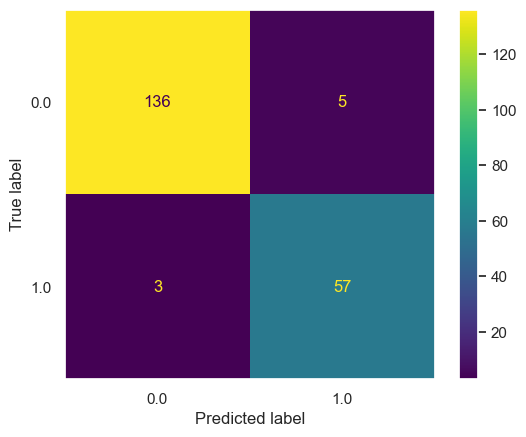

In [58]:
# Determining classification report for train set
print('---------Classification Report (Train Set)---------')
print(classification_report(y_train_final,y_pred_train_baseline))

# Creating confusion matrix for train set
sns.set(font_scale=1)
cm = confusion_matrix(y_train_final, y_pred_train_baseline, labels=best_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=best_model.classes_)

disp.plot()
plt.grid(False)
plt.show()

- __Test Set__

---------Classification Report (Test Set)---------
              precision    recall  f1-score   support

         0.0       0.80      0.93      0.86        55
         1.0       0.83      0.59      0.69        32

    accuracy                           0.80        87
   macro avg       0.81      0.76      0.77        87
weighted avg       0.81      0.80      0.80        87



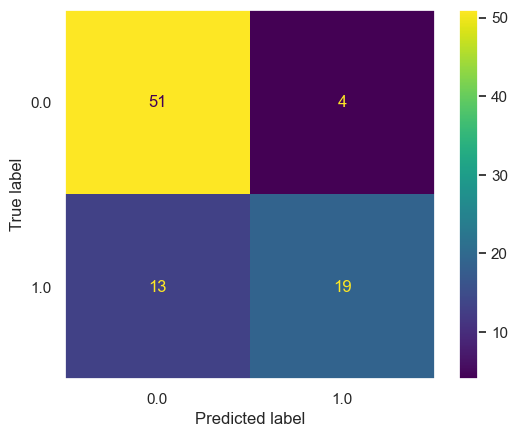

In [59]:
# Determining classification report for test set
print('---------Classification Report (Test Set)---------')
print(classification_report(y_test_final,y_pred_test_baseline))


# Creating confusion matrix for test set
sns.set(font_scale=1)
cm = confusion_matrix(y_test_final, y_pred_test_baseline, labels=best_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=best_model.classes_)

disp.plot()
plt.grid(False)
plt.show()

The baseline model seems to perform well overall. On the test set, the precision score is  0.826, which means it's making fewer correct positive predictions. The recall on the test set is 0.594, indicating that it's not identifying as many positive cases as in the training set. Despite this, the test accuracy is still decent at 0.805. The F1 score of 0.691 on the test set also reflects the trade-off between precision and recall.

### Hyperparameter Tuning

In [60]:
# Best Model
# create parameter grid
param_grid = [{'AB__n_estimators': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 20],
               'AB__learning_rate': [(0.97 + x / 100) for x in range(0, 8)],
               'AB__algorithm': ['SAMME', 'SAMME.R'],
               }]

In [61]:
# Train with Grid Search
grid_search  = GridSearchCV(best_model, param_grid = param_grid,refit = True,verbose=3)

# Fit the Grid Search on the training data
grid_search.fit(X_train_final, y_train_final)

# Get the best estimator from the Grid Search
best_est = grid_search.best_estimator_

# Get the best hyperparameters found during the Grid Search
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Fitting 5 folds for each of 192 candidates, totalling 960 fits
[CV 1/5] END AB__algorithm=SAMME, AB__learning_rate=0.97, AB__n_estimators=2;, score=0.756 total time=   0.0s
[CV 2/5] END AB__algorithm=SAMME, AB__learning_rate=0.97, AB__n_estimators=2;, score=0.925 total time=   0.0s
[CV 3/5] END AB__algorithm=SAMME, AB__learning_rate=0.97, AB__n_estimators=2;, score=0.775 total time=   0.0s
[CV 4/5] END AB__algorithm=SAMME, AB__learning_rate=0.97, AB__n_estimators=2;, score=0.800 total time=   0.0s
[CV 5/5] END AB__algorithm=SAMME, AB__learning_rate=0.97, AB__n_estimators=2;, score=0.900 total time=   0.0s
[CV 1/5] END AB__algorithm=SAMME, AB__learning_rate=0.97, AB__n_estimators=3;, score=0.805 total time=   0.0s
[CV 2/5] END AB__algorithm=SAMME, AB__learning_rate=0.97, AB__n_estimators=3;, score=0.800 total time=   0.0s
[CV 3/5] END AB__algorithm=SAMME, AB__learning_rate=0.97, AB__n_estimators=3;, score=0.725 total time=   0.0s
[CV 4/5] END AB__algorithm=SAMME, AB__learning_rate=0.97,

## Model Evaluation  - GridSearch

Classification Report : 
               precision    recall  f1-score   support

         0.0       0.86      0.92      0.89       141
         1.0       0.78      0.63      0.70        60

    accuracy                           0.84       201
   macro avg       0.82      0.78      0.79       201
weighted avg       0.83      0.84      0.83       201

Confusion Matrix Train Set


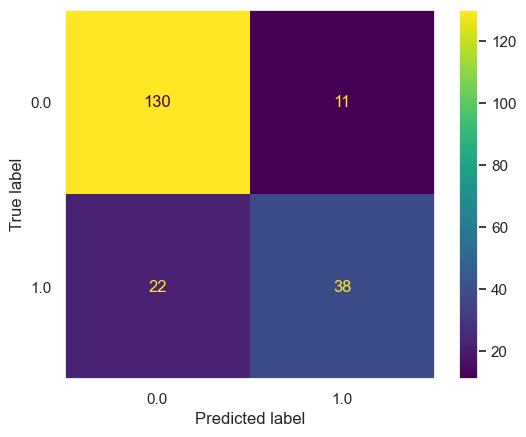

In [62]:
# Check Performance Model against Train-Set

y_pred_train_grid  = best_est.predict(X_train_final)
y_pred_test_grid  = best_est.predict(X_test_final)

# Creating confusion matrix for train set
print('Classification Report : \n', classification_report(y_train_final, y_pred_train_grid ))
print('Confusion Matrix Train Set')
cm = confusion_matrix(y_train_final, y_pred_train_grid , labels=best_est.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=best_est.classes_)

disp.plot()
plt.grid(False)
plt.show()

Classification Report : 
               precision    recall  f1-score   support

         0.0       0.84      0.98      0.91        55
         1.0       0.96      0.69      0.80        32

    accuracy                           0.87        87
   macro avg       0.90      0.83      0.85        87
weighted avg       0.89      0.87      0.87        87

Confusion Matrix Test Set


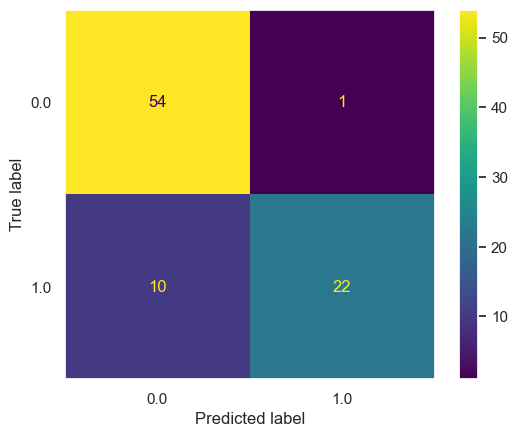

In [63]:
# Creating confusion matrix for test set

print('Classification Report : \n', classification_report(y_test_final, y_pred_test_grid))
print('Confusion Matrix Test Set')
cm = confusion_matrix(y_test_final, y_pred_test_grid, labels=best_est.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=best_est.classes_)

disp.plot()
plt.grid(False)
plt.show()

In [64]:
# Save Classification Report into a Dictionary
all_reports_hyper = {}
score_reports_baseline = {
    'train - precision' : round(precision_score(y_train_final, y_pred_train_baseline),3),
    'train - recall' : round(recall_score(y_train_final, y_pred_train_baseline),3),
    'train - accuracy' : round(accuracy_score(y_train_final, y_pred_train_baseline),3),
    'train - f1_score' : round(f1_score(y_train_final, y_pred_train_baseline),3),
    'test - precision' : round(precision_score(y_test_final, y_pred_test_baseline),3),
    'test - recall' : round(recall_score(y_test_final, y_pred_test_baseline),3),
    'test - accuracy' : round(accuracy_score(y_test_final, y_pred_test_baseline),3),
    'test - f1_score' : round(f1_score(y_test_final, y_pred_test_baseline),3),
}
all_reports_hyper['baseline'] = score_reports_baseline

score_reports_grid = {
    'train - precision' : round(precision_score(y_train_final, y_pred_train_grid),3),
    'train - recall' : round(recall_score(y_train_final, y_pred_train_grid),3),
    'train - accuracy' : round(accuracy_score(y_train_final, y_pred_train_grid),3),
    'train - f1_score' : round(f1_score(y_train_final, y_pred_train_grid),3),
    'test - precision' : round(precision_score(y_test_final, y_pred_test_grid),3),
    'test - recall' : round(recall_score(y_test_final, y_pred_test_grid),3),
    'test - accuracy' : round(accuracy_score(y_test_final, y_pred_test_grid),3),
    'test - f1_score' : round(f1_score(y_test_final, y_pred_test_grid),3),
}
all_reports_hyper['GridSearchCV'] = score_reports_grid

# create dataframe
pd.DataFrame(all_reports_hyper)

,baseline,GridSearchCV
train - precision,0.919,0.776
train - recall,0.950,0.633
train - accuracy,0.960,0.836
train - f1_score,0.934,0.697
test - precision,0.826,0.957
test - recall,0.594,0.688
test - accuracy,0.805,0.874
test - f1_score,0.691,0.800


Based on these results, the **GridSearchCV** model has slightly higher accuracy, precision, recall, and F1-score on the testing set, indicating better overall performance compared to the baseline model. Therefore, the **GridSearchCV** model is considered better in this comparison.

In [65]:
# Best model
best_model = best_est

We can gather the following insights from model evaluation: The GridSearchCV model outperforms the baseline in most aspects, including precision, accuracy, and F1 score on the test set.
-  **Precision:**

For the "Not Dead" class (0.0), the precision is 0.84. This means that when the model predicts an individual as "Not Dead," it's correct about 84% of the time.
For the "Dead" class (1.0), the precision is 0.96. This indicates that when the model predicts an individual as "Dead," it's correct about 96% of the time.
- **Recall (Sensitivity):**

For the "Not Dead" class (0.0), the recall is 0.98. This suggests that the model is able to identify about 98% of the actual "Not Dead" cases. This indicates that the model is effective at minimizing false negatives for the "Not Dead" class, as it rarely misses cases that are truly negative.

For the "Dead" class (1.0), the recall is 0.69. This means the model identifies around 69% of the actual "Dead" cases. This suggests that the model is not as sensitive when it comes to correctly identifying cases that are truly positive for the "Dead" class. It misses a significant portion of actual "Dead" cases, which could indicate that the model has a higher rate of false negatives for the "Dead" class.

- **F1-Score:**

The F1-score is a balanced measure of precision and recall. For the "Not Dead" class (0.0), the F1-score is 0.91, indicating a good balance between precision and recall for this class.
For the "Dead" class (1.0), the F1-score is 0.80, reflecting the balance between precision and recall for this class.
- **Accuracy:**

The overall accuracy of the model is 0.87, indicating that it correctly predicts the outcome for approximately 87% of the cases.

---

# ix. Model Saving
> This section explains the process of saving files related to the results of the models that we created in the previous chapter. Since there are only 10 data, handling outliers could be skipped.

In [66]:
# Saving Model Files

with open('best_model.pkl', 'wb') as file_1:
  pickle.dump(best_model, file_1)

with open('Drop_Columns.txt', 'w') as file_2:
  json.dump(Drop_Columns, file_2)


In this project, model inference is performed in a different notebook.

Model Inference Notebook: https://github.com/ahmadluay9/Heart-Failure-Prediction/blob/main/Inference.ipynb

Summary
The credit risk predictions made by the model seem to align well with the actual credit risk status for the majority of the data points, indicating a reasonable performance of the classification model.

---

# x. Conceptual Problems
> This section answers the conceptual problems:

1. Jelaskan latar belakang adanya bagging dan cara kerja bagging !

  Bagging (from bootstrap aggregating), is a a method that can improve the results of a machine learning classification algorithm by combining classification predictions from several models. It also reduces variance and helps to avoid overfitting. Although it is usually applied to decision tree methods, it can be used with any type of method. Bagging is a special case of the model averaging approach.

2. Jelaskan perbedaan cara kerja algoritma Random Forest dengan algoritma boosting yang Anda pilih !
  - Data Sampling Technique

      In **Random forest**, the training data is sampled based on the bagging technique.

      **Adaptive Boost Classifier** is based on boosting technique.
      
      [Boosting]('https://www.analyticsvidhya.com/blog/2021/04/best-boosting-algorithm-in-machine-learning-in-2021/') can be referred to as a set of algorithms whose primary function is to convert weak learners to strong learners. They have become mainstream in the Data Science industry because they have been around in the machine learning community for years. Boosting was first introduced by Freund and Schapire in the year 1997 with their AdaBoost algorithm, and since then, Boosting has been a prevalent technique for solving binary classification problems.

  - Estimate Calculation

      **Random Forest** aims to decrease variance not bias.

      **Adaptive Boost Classifier** aims to decrease bias, not variance.
      



--- 

# xi. Conclusion and Recommendation
> This section contains the conclusions of the analysis that has been carried out.

1. Based on Exploratory Data Analysis:
  - Number of deaths after the following days are different, where __Non-Death are 36% greater than Death__.
  - The number of male patients with heart failure is more than female patients. Where about 32% die during the follow-up period.
  - Male patients who have smoking habits have a higher chance of dying during follow up periods than any other conditions.

2. Based on Model Evaluation:
  - Based on the model evaluation, the best model is AdaBoost Classifier that has been improved with hyperparameter tuning using GridSearch. The model achieves high accuracy (87%) in correctly classifying whether the patient died during the follow-up period or not. For the "Dead" class (1.0), the recall is 0.69. This means the model identifies around 69% of the actual "Dead" cases. This suggests that the model is not as sensitive when it comes to correctly identifying cases that are truly positive for the "Dead" class. It misses a significant portion of actual "Dead" cases, which could indicate that the model has a higher rate of false negatives for the "Dead" class. 